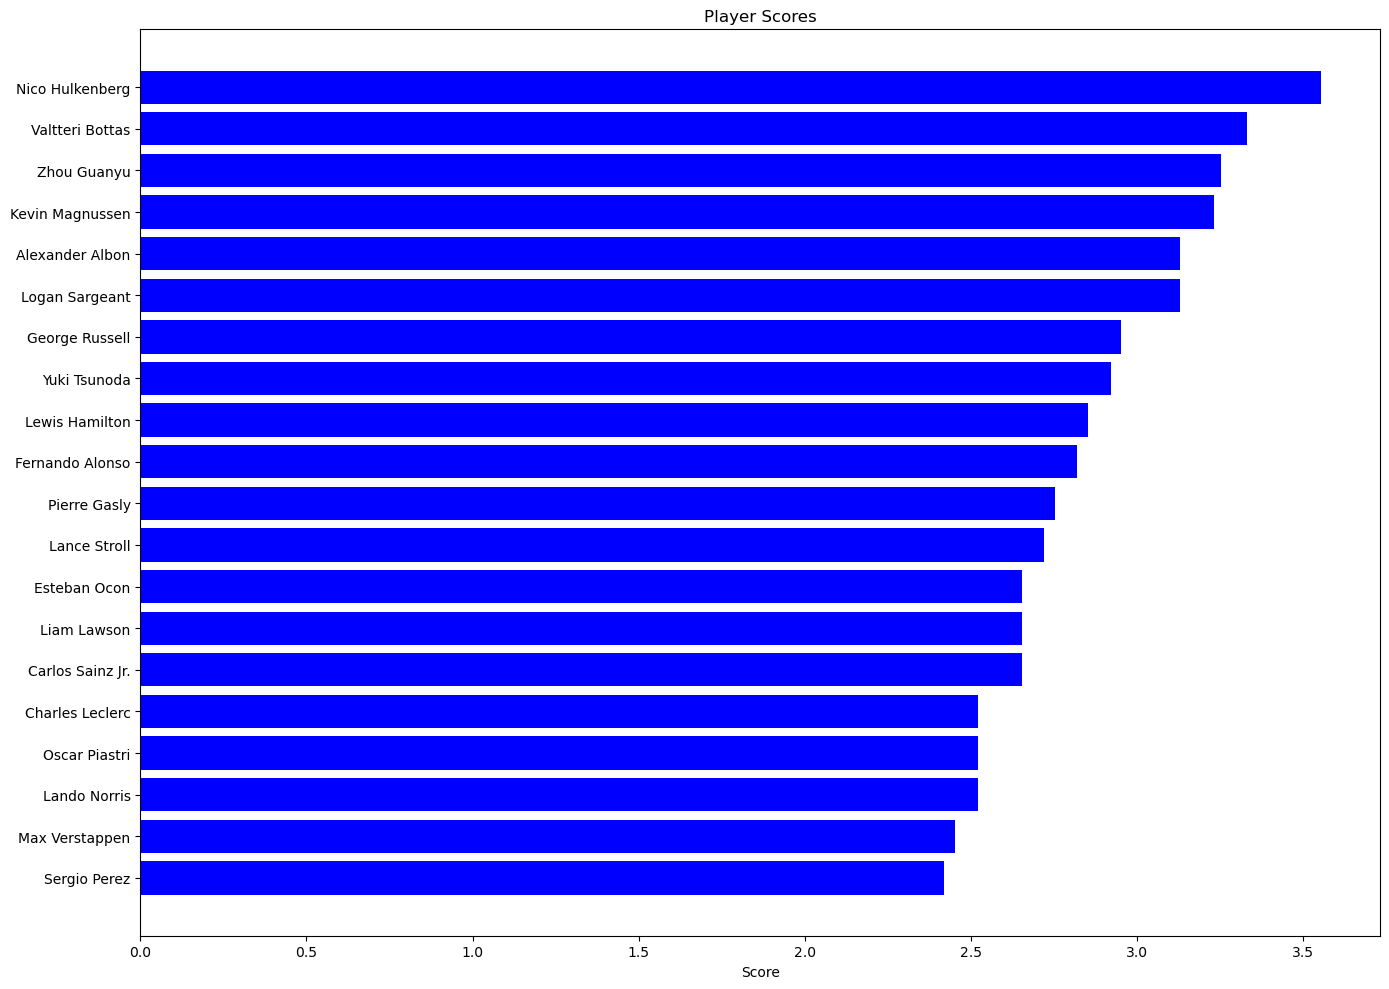

In [1]:
import json
import matplotlib.pyplot as plt

# Load the JSON data from the file
with open('prizepicks.json', 'r') as file:
    data = json.load(file)

# Clean the score data
for item in data:
    item['score'] = float(item['score'].split('.')[0] + '.' + item['score'].split('.')[1])
    
# Sort the data by score for better visualization
sorted_data = sorted(data, key=lambda x: x['score'])

# Separate names and scores for plotting
names = [item['name'] for item in sorted_data]
scores = [item['score'] for item in sorted_data]

# Create a bar chart
plt.figure(figsize=(14,10))
plt.barh(names, scores, color='blue')
plt.xlabel('Score')
plt.title('Player Scores')
plt.tight_layout()
plt.show()


In [2]:
! pip install kaleido

In [12]:
import plotly.express as px
import pandas as pd 
# Clean the score data
# for item in data:
#     if isinstance(item['score'], str) and item['score'].count('.') > 1:
#         item['score'] = float(item['score'][:item['score'].rfind('.')])
print(data)
for item in data:
    item['score'] = str(item['score'])
    item['score'] = float(item['score'].split('.')[0] + '.' + item['score'].split('.')[1])

# Create and display a dataframe
df = pd.DataFrame(data)
#Print cols
print(df.columns)

# Drop the duplicated 'name' rows and keep the lowest score
df = df.sort_values('score').drop_duplicates('name', keep='first')

# Plotly chart
# Make it horizontal so it fits in twitter better
# fig = px.bar(x=df['name'], y=df['score'], color=df['score'], color_continuous_scale='reds')
fig = px.bar(x=df['name'], y=df['score'], color=df['score'], color_continuous_scale='reds')
fig.update_layout(title='PrizePicks: 1st Pit Stop Time (Sec) - Over/Under', xaxis_title='Name', yaxis_title='1st Pit Stop Time (Sec)')

# Add data labels
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside', text=df['score'])


fig.update_layout(xaxis=dict(autorange="reversed"))
fig.show()

# Export for posting to twitter
# fig.write_image('prizepicks1.png', width=1000, height=600, scale=2)
# Write html file for posting to twitter
fig.write_html('prizepicks1.html')

[{'name': 'Oscar Piastri', 'score': 2.52}, {'name': 'Lando Norris', 'score': 2.52}, {'name': 'Max Verstappen', 'score': 2.452}, {'name': 'Sergio Perez', 'score': 2.42}, {'name': 'Charles Leclerc', 'score': 2.52}, {'name': 'Carlos Sainz Jr.', 'score': 2.652}, {'name': 'Logan Sargeant', 'score': 3.13}, {'name': 'Alexander Albon', 'score': 3.13}, {'name': 'Liam Lawson', 'score': 2.652}, {'name': 'Yuki Tsunoda', 'score': 2.92}, {'name': 'Pierre Gasly', 'score': 2.752}, {'name': 'Esteban Ocon', 'score': 2.652}, {'name': 'Lewis Hamilton', 'score': 2.852}, {'name': 'George Russell', 'score': 2.952}, {'name': 'Fernando Alonso', 'score': 2.82}, {'name': 'Lance Stroll', 'score': 2.72}, {'name': 'Valtteri Bottas', 'score': 3.33}, {'name': 'Zhou Guanyu', 'score': 3.253}, {'name': 'Nico Hulkenberg', 'score': 3.553}, {'name': 'Kevin Magnussen', 'score': 3.23}, {'name': 'Max Verstappen', 'score': 2.45}, {'name': 'Lando Norris', 'score': 2.5}]
Index(['name', 'score'], dtype='object')


In [4]:
# Read in standings.xlsx
import pandas as pd
df2 = pd.read_excel('standings.xlsx')
df2

,Grand Prix,Team,Driver,Fastest Stop
0,Bahrain,Ferrari,Charles Leclerc,2.22s
1,Saudi Arabia,Ferrari,Charles Leclerc,2.10s
2,Australia,Red Bull,Sergio Perez,2.11s
3,Azerbaijan,Red Bull,Sergio Perez,2.30s
4,Miami,Ferrari,Carlos Sainz,2.21s
5,Emilia-Romagna,NaN,NaN,NaN
6,Monaco,Red Bull,Sergio Perez,2.15s
7,Spain,Red Bull,Sergio Perez,2.07s
8,Canada,Red Bull,Sergio Perez,2.23s
9,Austria,McLaren,Lando Norris,2.10s


In [5]:
# print cols
print(df2.columns)

Index(['Grand Prix', 'Team', 'Driver', 'Fastest Stop'], dtype='object')


In [6]:
import pandas as pd

def pit_stop_stats(df):
    team_counts = {}
    driver_counts = {}
    fastest_stop = float('inf')
    fastest_stop_driver = ""
    fastest_stop_gp = ""
    
    # Remove "s" from 'Fastest Stop' column
    df['Fastest Stop'] = df['Fastest Stop'].str.replace('s', '').astype(float)

    # Drop columns witb NaN values for 'Fastest Stop'
    df = df.dropna(subset=['Fastest Stop'])

    for index, row in df.iterrows():
        gp, team, driver, time = row['Grand Prix'], row['Team'], row['Driver'], row['Fastest Stop']
        if time:  # make sure time is not 'n/a'
            team_counts[team] = team_counts.get(team, 0) + 1
            driver_counts[driver] = driver_counts.get(driver, 0) + 1
            
            if time < fastest_stop:
                fastest_stop = time
                fastest_stop_driver = driver
                fastest_stop_gp = gp

    print("Teams with Most Fastest Stops:")
    for team, count in sorted(team_counts.items(), key=lambda x: x[1], reverse=True):
        print(f"- {team}: {count}")

    print("\nDriver with Most Fastest Stops:")
    for driver, count in sorted(driver_counts.items(), key=lambda x: x[1], reverse=True):
        print(f"- {driver}: {count}")

    print(f"\nFastest Pit Stop:\n- {fastest_stop}s by {fastest_stop_driver} in {fastest_stop_gp}")
    print("The average fastest pit stop was {:.2f}s".format(df['Fastest Stop'].mean()))
    print("{} has had the fastest time the most ({} races), had an average fastest pit stop of {:.2f}s,".format(df['Driver'].mode()[0], df['Driver'].value_counts().max(), df[df['Driver'] == df['Driver'].mode()[0]]['Fastest Stop'].mean()))
    print("winning in:")
    comma_sep = []
    for gp in df[df['Driver'] == df['Driver'].mode()[0]]['Grand Prix']:
        comma_sep.append(gp)
    print(', '.join(comma_sep))

    return df

# Call the function

df2 = pit_stop_stats(df2)



Teams with Most Fastest Stops:
- Red Bull: 8
- Ferrari: 4
- McLaren: 3

Driver with Most Fastest Stops:
- Sergio Perez: 7
- Charles Leclerc: 3
- Lando Norris: 3
- Carlos Sainz: 1
- Max Verstappen: 1

Fastest Pit Stop:
- 1.98s by Sergio Perez in Hungary
The average fastest pit stop was 2.16s
Sergio Perez has had the fastest time the most (7 races), had an average fastest pit stop of 2.17s,
winning in:
Australia, Azerbaijan, Monaco, Spain, Canada, Hungary, Singapore


In [7]:
# plotly chart
import plotly.express as px
import pandas as pd
df2

# Chart Pit Stop Box Plot for each driver, and put the number of fastest stops in data labels
fig = px.box(df2, x='Driver', y='Fastest Stop', color='Driver', title='Pit Stop Times by Driver')
fig.update_layout(xaxis_title='Driver', yaxis_title='Pit Stop Time (Sec)')
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', text=df2['Fastest Stop']) # Did you mean "hovertemplate"?
# Add data labels
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', text=df2['Fastest Stop'])
fig.show()

In [8]:
# Create a dataframe with the average number of fastest stops per driver
df3 = df2.groupby('Driver').count().reset_index()
df3_mean = df2.groupby('Driver').mean().reset_index()
# In df3_mean, rename 'Fastes Stop' to 'Average Fastest Stop'
df3_mean = df3_mean.rename(columns={'Fastest Stop': 'Average Fastest Stop'})
df3

C:\Users\ccscr\AppData\Local\Temp\ipykernel_27512\1424501979.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Driver,Grand Prix,Team,Fastest Stop
0,Carlos Sainz,1,1,1
1,Charles Leclerc,3,3,3
2,Lando Norris,3,3,3
3,Max Verstappen,1,1,1
4,Sergio Perez,7,7,7


In [9]:
# Left join df.name on df3.Driver to get the 'Fastest Stop' column
df4 = df.merge(df3[['Driver', 'Fastest Stop']], how='left', left_on='name', right_on='Driver')

# Drop the 'Driver' column
df4 = df4.drop('Driver', axis=1)

# Do the same with df3_mean
df4 = df4.merge(df3_mean[['Driver', 'Average Fastest Stop']], how='left', left_on='name', right_on='Driver')
df4 = df4.drop('Driver', axis=1)

# Fill Fastest Stop NaN values with 0
df4['Fastest Stop'] = df4['Fastest Stop'].fillna(0)

df4

,name,score,Fastest Stop,Average Fastest Stop
0,Sergio Perez,2.420,7.0,2.165714
1,Max Verstappen,2.450,1.0,2.010000
2,Lando Norris,2.500,3.0,2.153333
3,Oscar Piastri,2.520,0.0,NaN
4,Charles Leclerc,2.520,3.0,2.170000
5,Carlos Sainz Jr.,2.652,0.0,NaN
6,Liam Lawson,2.652,0.0,NaN
7,Esteban Ocon,2.652,0.0,NaN
8,Lance Stroll,2.720,0.0,NaN
9,Pierre Gasly,2.752,0.0,NaN


In [10]:
df = df4

In [11]:
# Create combination chart
fig = go.Figure()

# Add bars for Fastest Stop
fig.add_trace(go.Bar(
    x=df['name'],
    y=df['Fastest Stop'],
    name='Number of Fastest Stops',
    marker_color='green'
))
# Add bars for Score (Japan GP - 1st Stop (O/U))
fig.add_trace(go.Bar(
    x=df['name'],
    y=df['score'],
    name='Japan GP - 1st Stop (O/U)',
    marker_color='blue',
    yaxis='y2'
))


# Add line for Average Fastest Stop
fig.add_trace(go.Scatter(
    x=df['name'],
    y=df['Average Fastest Stop'],
    mode='lines+markers',
    name='Average Fastest Stop',
    line=dict(color='red', width=2.5),
    yaxis='y2'  # Line on secondary y-axis
))

# Update layout for dual y-axes, grouped bars, and set range for y-axes
fig.update_layout(
    title="Driver Statistics",
    xaxis_title="Driver",
    yaxis_title="Seconds and Number of Fastest Stops",
    # yaxis=dict(range=[0, 3.5]),  # Adjust as necessary for your data
    yaxis2=dict(title="Average Fastest Stop Time", overlaying='y', side='right', range=[2, 3.5]),
    barmode='group',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    )
)


# Show figure
fig.show()


NameError: name 'go' is not defined

In [ ]:
df

,name,score,Fastest Stop,Average Fastest Stop
0,Sergio Perez,2.420,7.0,2.165714
1,Max Verstappen,2.450,1.0,2.010000
2,Lando Norris,2.500,3.0,2.153333
3,Oscar Piastri,2.520,0.0,NaN
4,Charles Leclerc,2.520,3.0,2.170000
5,Carlos Sainz Jr.,2.652,0.0,NaN
6,Liam Lawson,2.652,0.0,NaN
7,Esteban Ocon,2.652,0.0,NaN
8,Lance Stroll,2.720,0.0,NaN
9,Pierre Gasly,2.752,0.0,NaN


In [ ]:
# Create combination chart
fig = go.Figure()

# Updated Color Palette
colors = {
    "bars1": "#2E91E5",  # Light blue
    "bars2": "#E15F99",  # Pinkish
    "line": "#1CA71C"    # Dark green
}

# Add bars for Fastest Stop
fig.add_trace(go.Bar(
    x=df['name'],
    y=df['Fastest Stop'],
    name='Number of Fastest Stops',
    marker_color=colors["bars1"],
    opacity=0.7  # Adding some opacity
))

# Add bars for Score (Japan GP - 1st Stop (O/U))
fig.add_trace(go.Bar(
    x=df['name'],
    y=df['score'],
    name='Japan GP - 1st Stop (O/U)',
    marker_color=colors["bars2"],
    yaxis='y2',
    opacity=0.7  # Adding some opacity
))

# Add line for Average Fastest Stop
fig.add_trace(go.Scatter(
    x=df['name'],
    y=df['Average Fastest Stop'],
    mode='lines+markers',
    name='Average Fastest Stop',
    line=dict(color=colors["line"], width=2.5),
    yaxis='y2'  # Line on secondary y-axis
))

# Update layout for dual y-axes, grouped bars, and set range for y-axes
fig.update_layout(
    title="Japan GP - 1st Stop (O/U) vs. Fastest Stop Standings",
    xaxis_title="Driver",
    yaxis_title="Number of Fastest Stops",
    yaxis2=dict(title="Stop Time (s)", overlaying='y', side='right', range=[2, 3.5]),
    barmode='group',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    font=dict(
        family="Arial, sans-serif",  # Consistent font
        size=12,
        color="#7f7f7f"  # Greyish tone
    ),
    plot_bgcolor="white",  # White background
    paper_bgcolor="white",
    xaxis=dict(
        gridcolor="#F5F5F5",  # Light grey grid lines
        gridwidth=2,
        zerolinewidth=0,
        zerolinecolor="#979797",  # Grey zero line
        linecolor="#E5E5E5"  # Grey axis line
    ),
    yaxis=dict(
        gridcolor="#F5F5F5",
        gridwidth=2,
        zerolinewidth=1,
        zerolinecolor="#979797",
        linecolor="#E5E5E5"
    )
)

# Show figure
fig.show()
